# 🦠 Breast Cancer 🩺 EDA and Classification 🧬

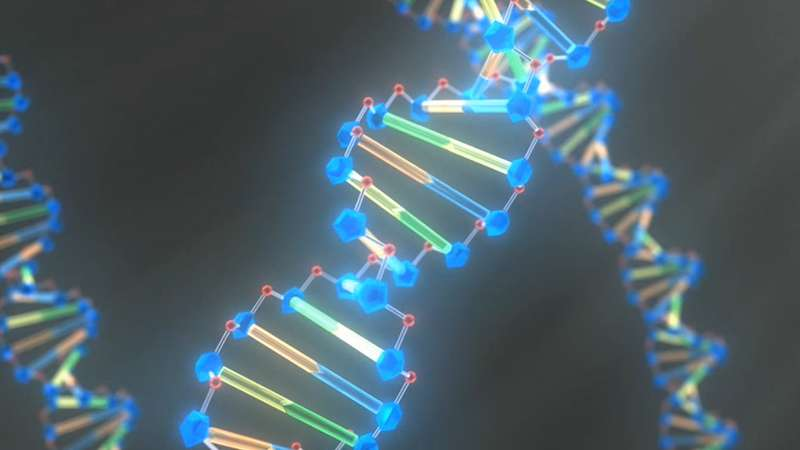

Dataset taken for this project is "Breast Cancer Wisconsin (Diagnostic) Data Set" , It is available at kaggle (https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

In [1]:
# Ignoring Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Downloading Dataset
df = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/AIML-B2/main/data.csv")

In [4]:
# First Look at the data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

There are total 32 columns in this dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
# Column which is unnamed 
df['Unnamed: 32']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64

In [8]:
# Dropping COlumn 
df = df.drop("Unnamed: 32", axis=1)

In [9]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Patient ID has no correlation with cancer so dropping column id

In [11]:
df.drop('id', axis=1, inplace=True)
# df = df.drop('id', axis=1)

In [12]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [13]:
type(df.columns)

pandas.core.indexes.base.Index

In [14]:
# Taking list of remaining columns
l = list(df.columns)
print(l)

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [15]:
features_mean = l[1:11]

features_se = l[11:21]

features_worst = l[21:]

In [16]:
print(features_mean)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']


In [17]:
print(features_se)

['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']


In [18]:
print(features_worst)

['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [19]:
df.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [20]:
df['diagnosis'].unique()
# M= Malignant, B= Benign

array(['M', 'B'], dtype=object)

Number of Benign:  357
Number of Malignant :  212


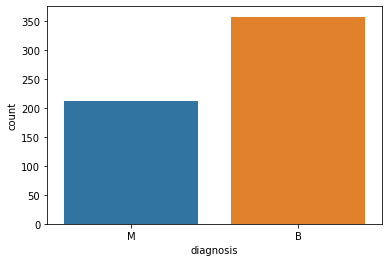

In [21]:
ax = sns.countplot(df['diagnosis'],label="Count")       # M = 212, B = 357
B, M = df['diagnosis'].value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [22]:
df.shape

(569, 31)

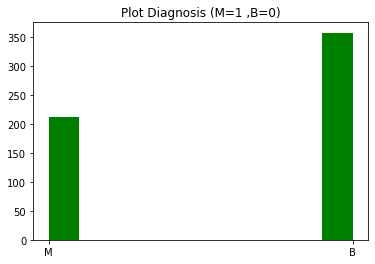

In [23]:
plt.hist(df['diagnosis'],color='g')
plt.title('Plot Diagnosis (M=1 ,B=0)')
plt.show()

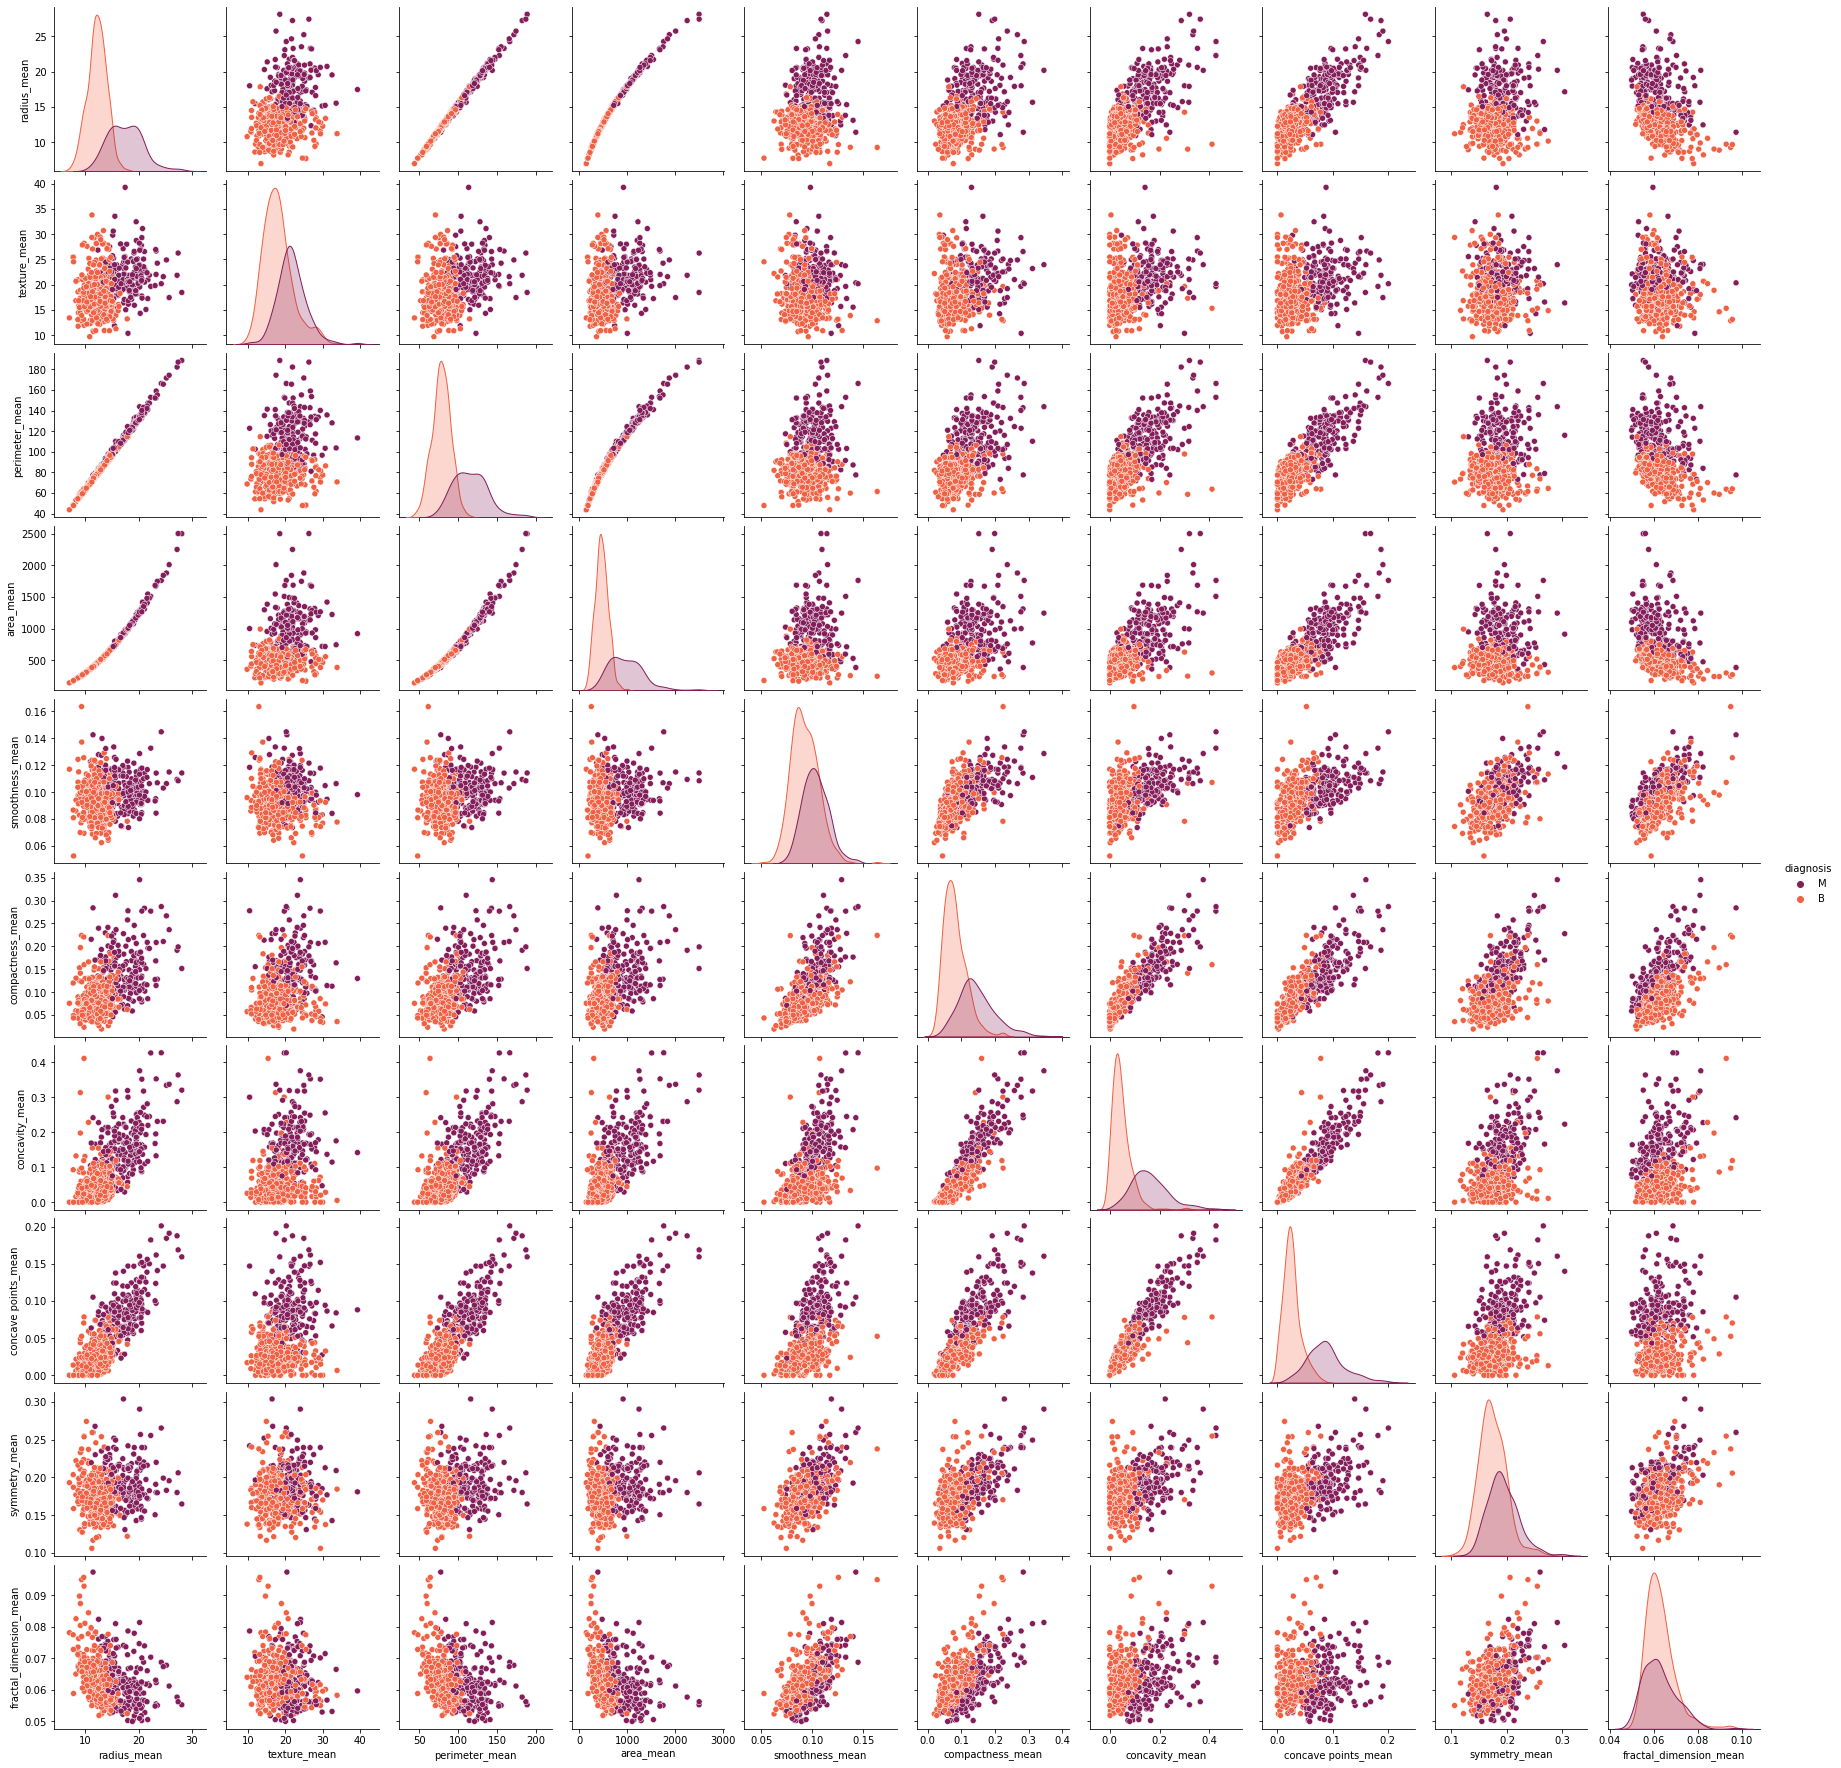

In [24]:
# generate a scatter plot matrix with the "mean" columns
cols = ['diagnosis',
        'radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']

sns.pairplot(data=df[cols], hue='diagnosis', palette='rocket')

###  Distribution of radius_mean

Text(0.5, 1.0, 'Distribution of radius_mean')

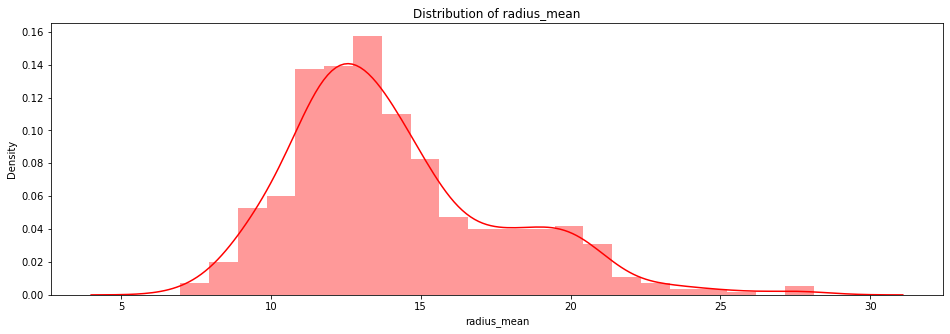

In [25]:
f, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(df["radius_mean"], color="red",ax = axes)
plt.title("Distribution of radius_mean")

### Distribution of texture_mean

Text(0.5, 1.0, 'Distribution of texture_mean')

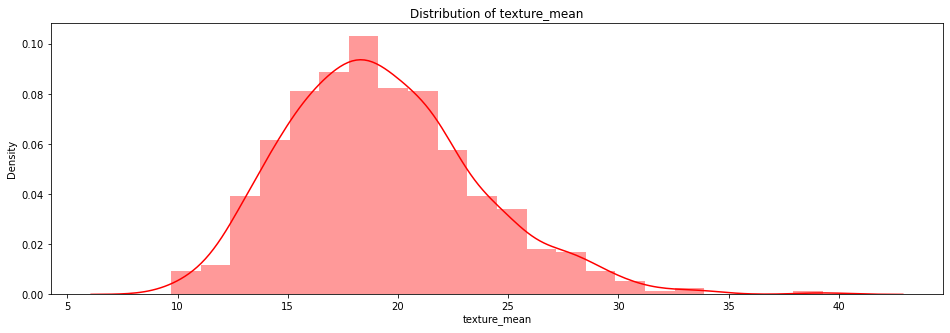

In [26]:
f1, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(df["texture_mean"], color="red",ax = axes)
plt.title("Distribution of texture_mean")

### Distribution of perimeter_mean

Text(0.5, 1.0, 'Distribution of perimeter_mean')

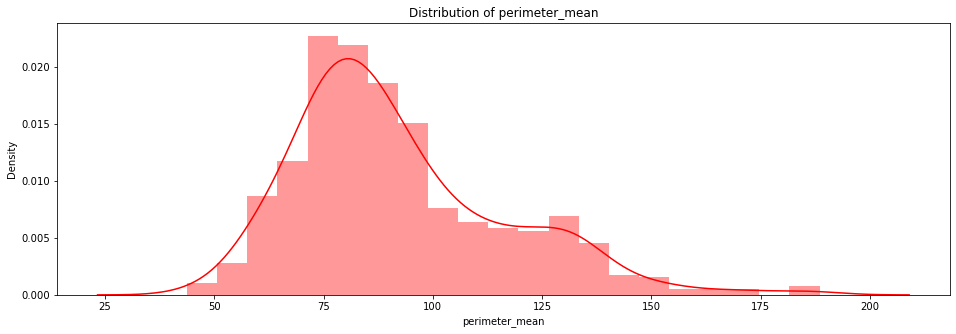

In [27]:
f2, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(df["perimeter_mean"], color="red",ax = axes)
plt.title("Distribution of perimeter_mean")

### Distribution of area_mean

Text(0.5, 1.0, 'Distribution of area_mean')

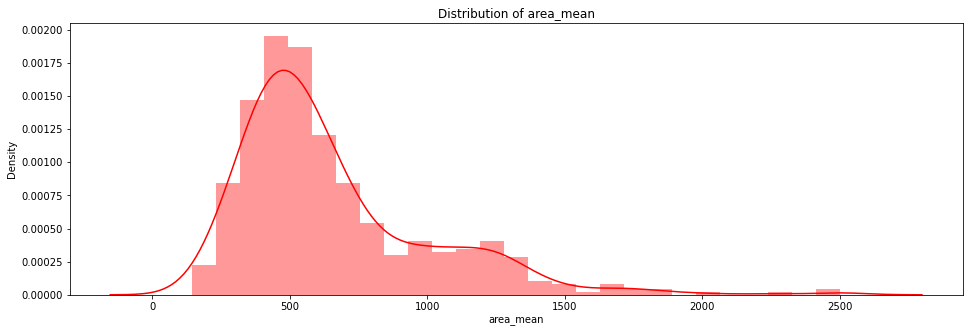

In [28]:
f3, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(df["area_mean"], color="red",ax = axes)
plt.title("Distribution of area_mean")

### Distribution of smoothness_mean

Text(0.5, 1.0, 'Distribution of smoothness_mean')

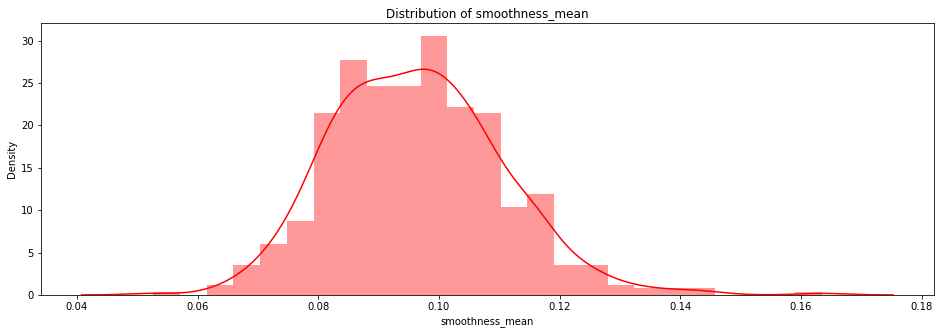

In [29]:
f4, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(df["smoothness_mean"], color="red",ax = axes)
plt.title("Distribution of smoothness_mean")

### Distribution of compactness_mean

Text(0.5, 1.0, 'Distribution of compactness_mean')

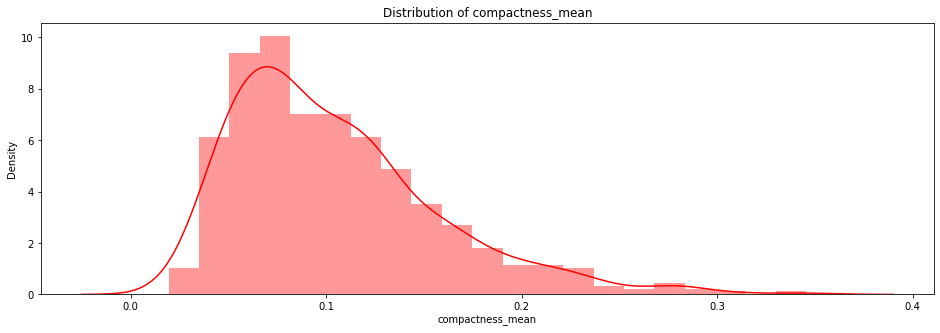

In [30]:
f5, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(df["compactness_mean"], color="red",ax = axes)
plt.title("Distribution of compactness_mean")

### Distribution of concavity_mean

Text(0.5, 1.0, 'Distribution of concavity_mean')

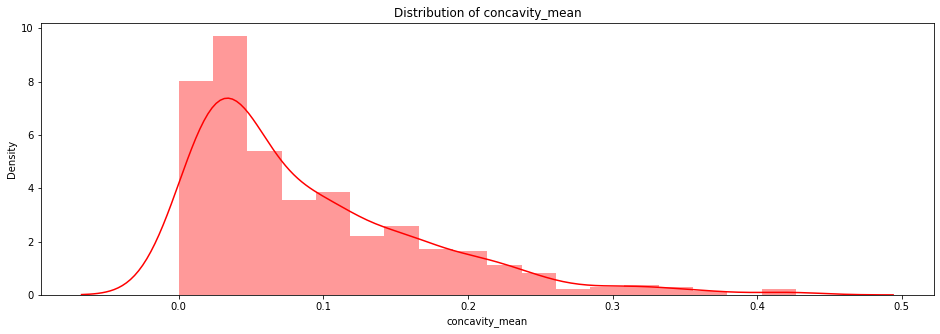

In [31]:
f6, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(df["concavity_mean"], color="red",ax = axes)
plt.title("Distribution of concavity_mean")

### Distribution of concave points_mean

Text(0.5, 1.0, 'Distribution of concave points_mean')

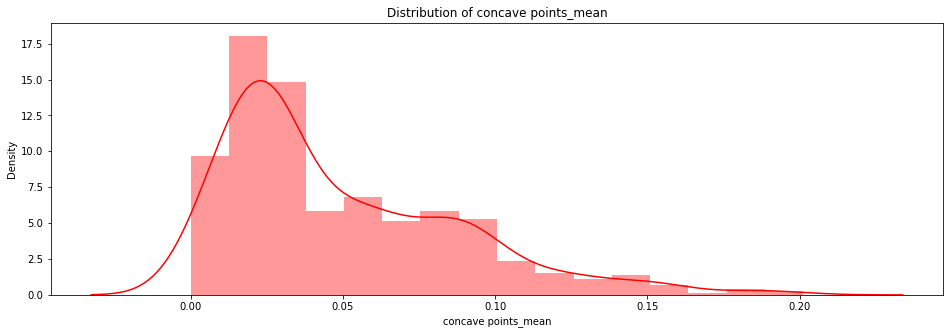

In [32]:
f7, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(df["concave points_mean"], color="red",ax = axes)
plt.title("Distribution of concave points_mean")

### Distribution of symmetry_mean

Text(0.5, 1.0, 'Distribution of symmetry_mean')

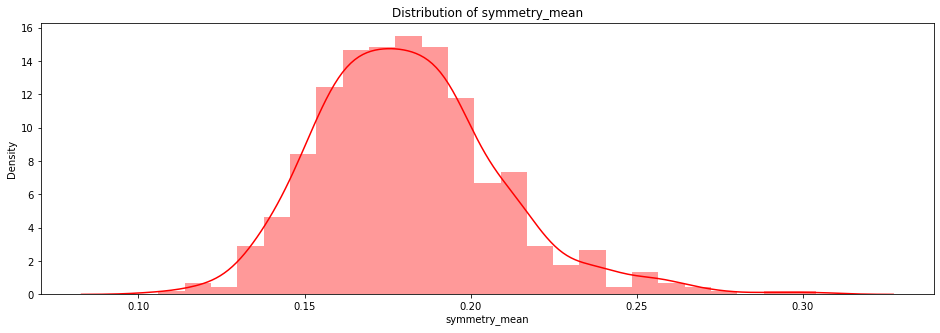

In [33]:
f8, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(df["symmetry_mean"], color="red",ax = axes)
plt.title("Distribution of symmetry_mean")

### Distribution of fractal_dimension_mean

Text(0.5, 1.0, 'Distribution of fractal_dimension_mean')

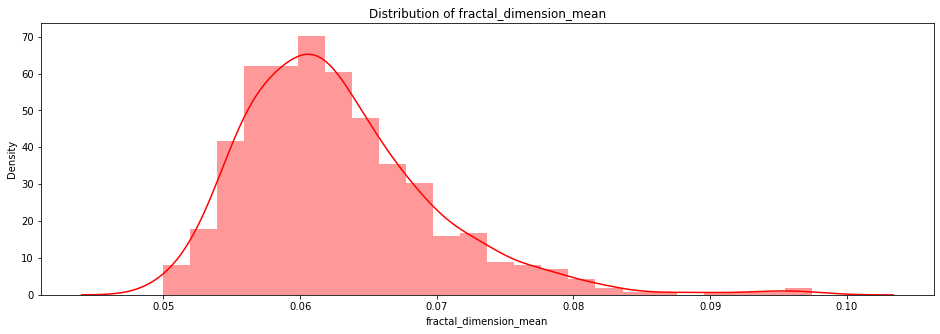

In [34]:
f9, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(df["fractal_dimension_mean"], color="red",ax = axes)
plt.title("Distribution of fractal_dimension_mean")

### Distribution of radius_se

Text(0.5, 1.0, 'Distribution of radius_se ')

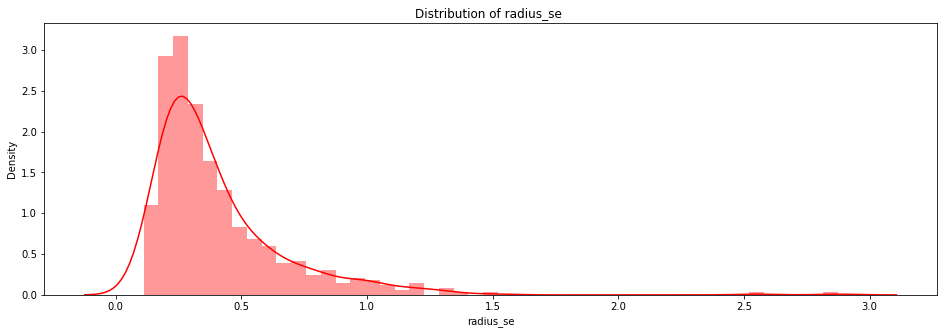

In [35]:
f11, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(df["radius_se"], color="red",ax = axes)
plt.title("Distribution of radius_se ")

### Distribution of texture_se

Text(0.5, 1.0, 'Distribution of texture_se')

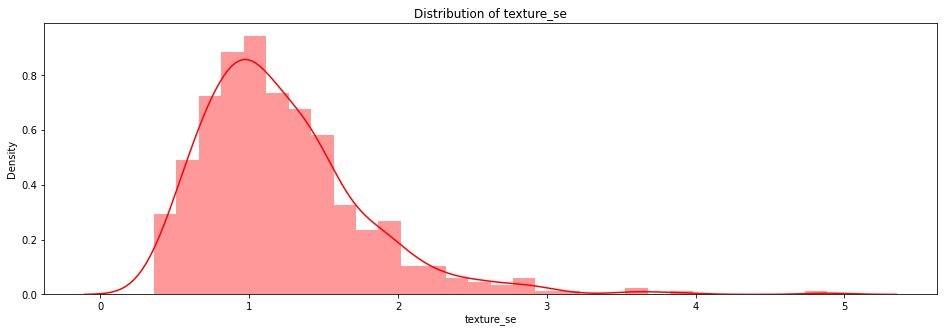

In [36]:
f12, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(df["texture_se"], color="red",ax = axes)
plt.title("Distribution of texture_se")

### Distribution of perimeter_se

Text(0.5, 1.0, 'Distribution of perimeter_se ')

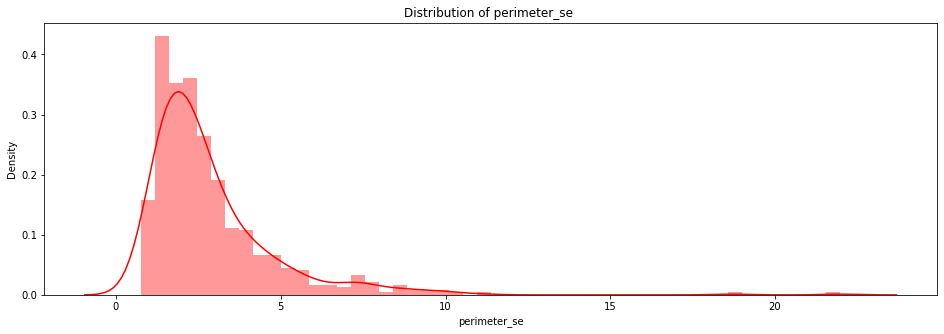

In [37]:
f13, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(df["perimeter_se"], color="red",ax = axes)
plt.title("Distribution of perimeter_se ")

### Distribution of area_se

Text(0.5, 1.0, 'Distribution of area_se')

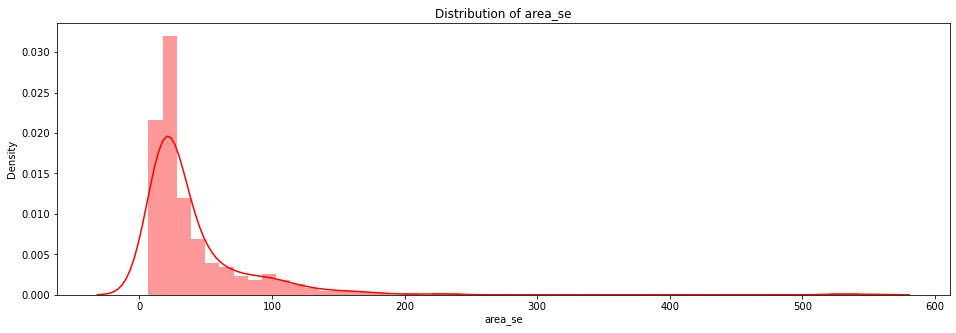

In [38]:
f14, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(df["area_se"], color="red",ax = axes)
plt.title("Distribution of area_se")

### Distribution of smoothness_se

Text(0.5, 1.0, 'Distribution of smoothness_se')

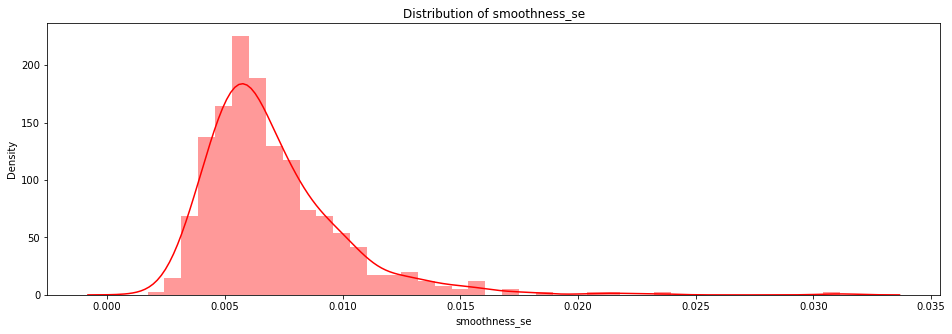

In [39]:
f15, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(df["smoothness_se"], color="red",ax = axes)
plt.title("Distribution of smoothness_se")

### Distribution of compactness_se

Text(0.5, 1.0, 'Distribution of compactness_se')

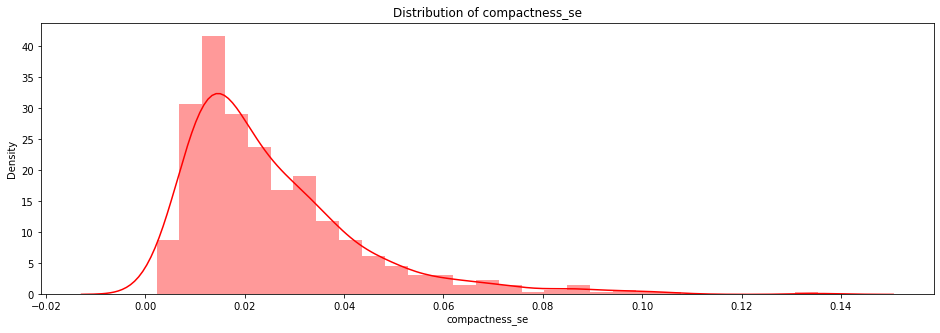

In [40]:
f16, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(df["compactness_se"], color="red",ax = axes)
plt.title("Distribution of compactness_se")

### Distribution of concavity_se

Text(0.5, 1.0, 'Distribution of concavity_se')

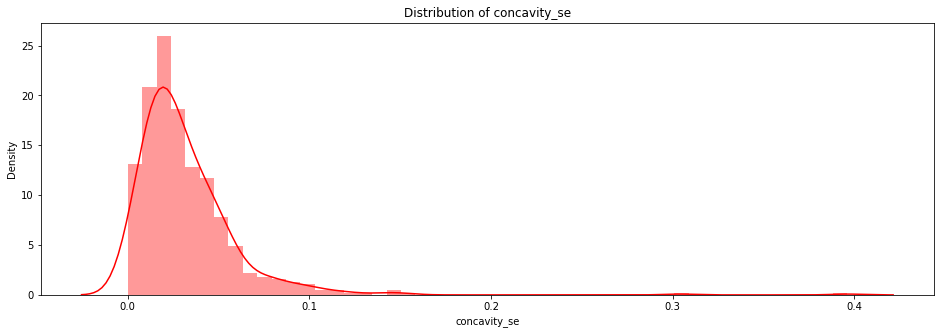

In [41]:
f17, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(df["concavity_se"], color="red",ax = axes)
plt.title("Distribution of concavity_se")

### Distribution of symmetry_se

Text(0.5, 1.0, 'Distribution of symmetry_se')

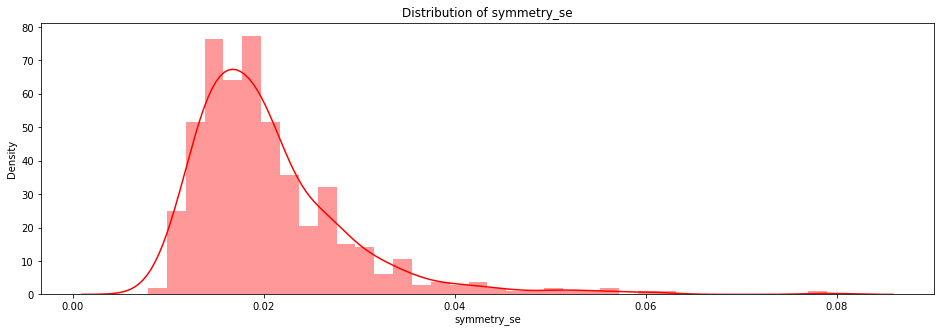

In [42]:
f18, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(df["symmetry_se"], color="red",ax = axes)
plt.title("Distribution of symmetry_se")

### Distribution of fractal_dimension_se

Text(0.5, 1.0, 'Distribution of fractal_dimension_se')

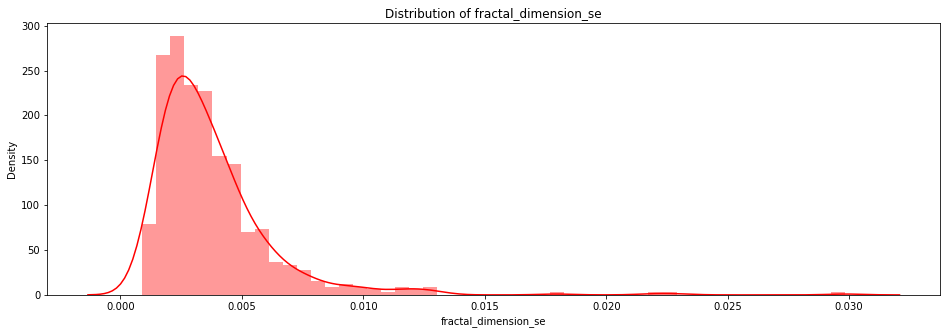

In [43]:
f19, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(df["fractal_dimension_se"], color="red",ax = axes)
plt.title("Distribution of fractal_dimension_se")

### Distribution of radius_worst

Text(0.5, 1.0, 'Distribution of radius_worst')

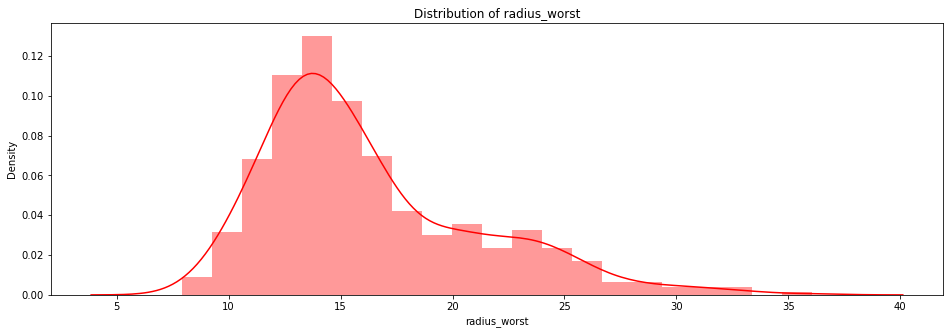

In [44]:
f20, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(df["radius_worst"], color="red",ax = axes)
plt.title("Distribution of radius_worst")

### Distribution of texture_worst

Text(0.5, 1.0, 'Distribution of texture_worst')

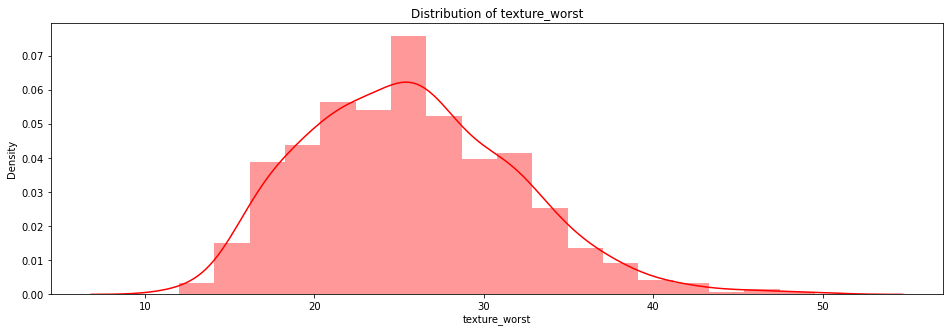

In [45]:
f21, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(df["texture_worst"], color="red",ax = axes)
plt.title("Distribution of texture_worst")

### Distribution of perimeter_worst

Text(0.5, 1.0, 'Distribution of perimeter_worst')

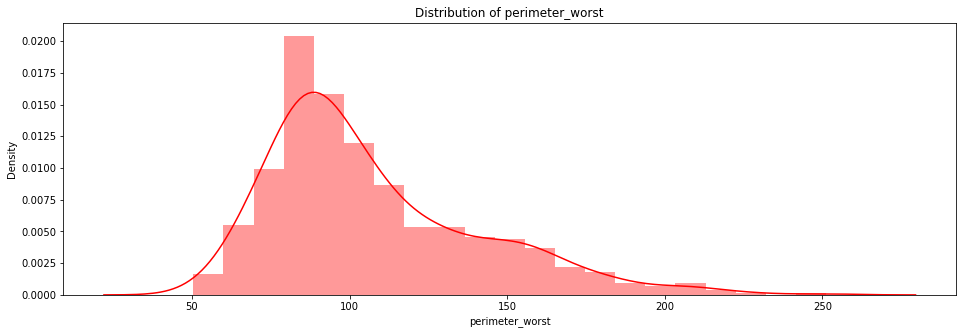

In [46]:
f22, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(df["perimeter_worst"], color="red",ax = axes)
plt.title("Distribution of perimeter_worst")

### Distribution of area_worst

Text(0.5, 1.0, 'Distribution of area_worst')

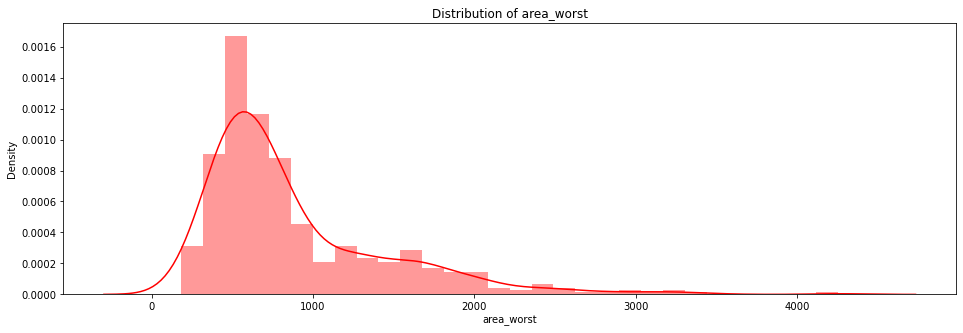

In [47]:
f23, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(df["area_worst"], color="red",ax = axes)
plt.title("Distribution of area_worst")

### Distribution of smoothness_worst

Text(0.5, 1.0, 'Distribution of smoothness_worst')

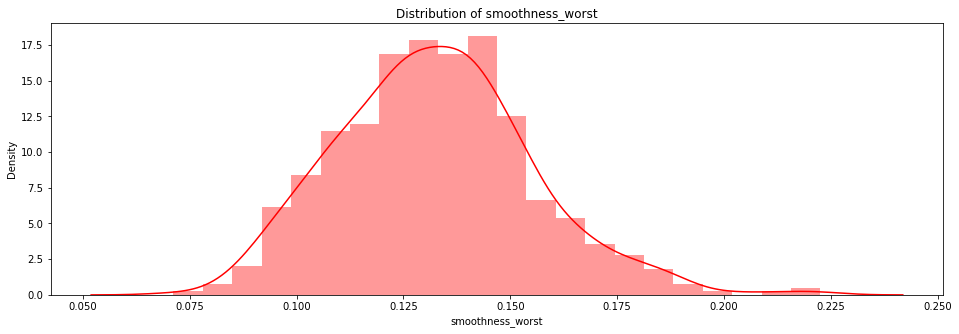

In [48]:
f24, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(df["smoothness_worst"], color="red",ax = axes)
plt.title("Distribution of smoothness_worst")

### Distribution of compactness_worst

Text(0.5, 1.0, 'Distribution of compactness_worst')

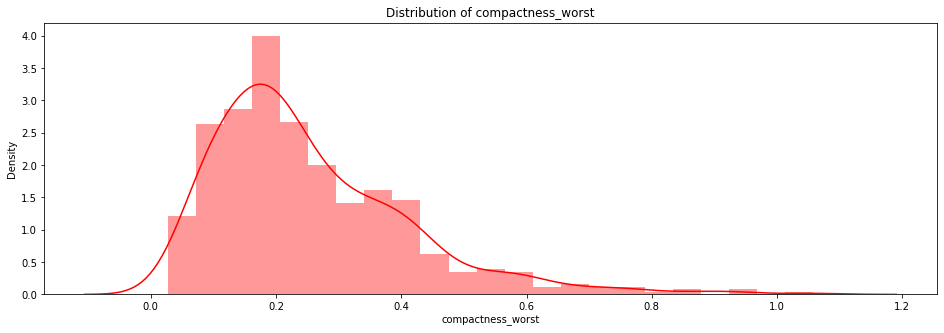

In [49]:
f25, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(df["compactness_worst"], color="red",ax = axes)
plt.title("Distribution of compactness_worst")

### Distribution of concavity_worst

Text(0.5, 1.0, 'Distribution of concavity_worst')

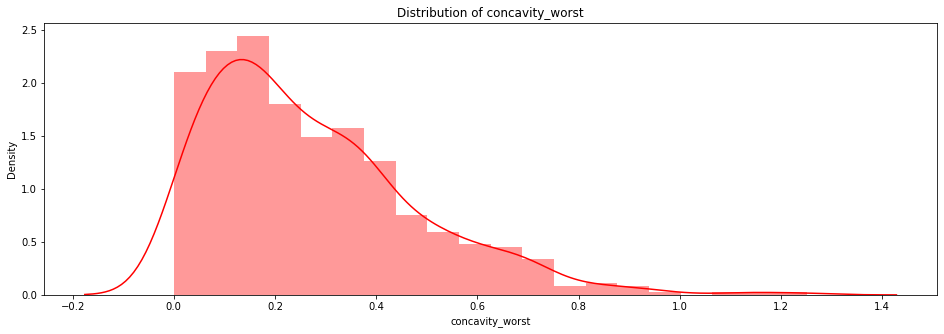

In [50]:
f26, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(df["concavity_worst"], color="red",ax = axes)
plt.title("Distribution of concavity_worst")

### Distribution of concave points_worst

Text(0.5, 1.0, 'Distribution of concave points_worst')

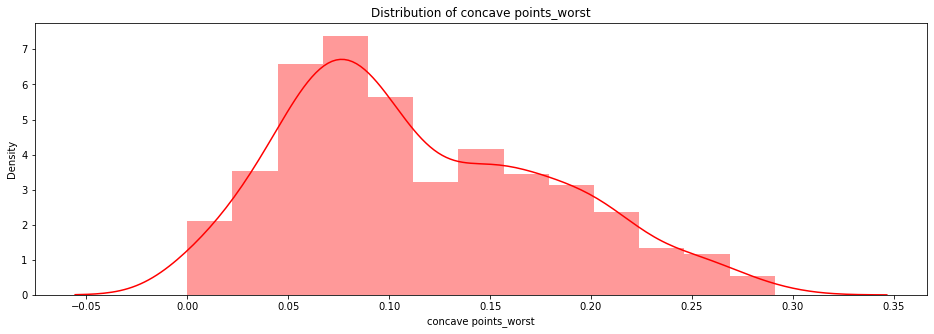

In [51]:
f27, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(df["concave points_worst"], color="red",ax = axes)
plt.title("Distribution of concave points_worst")

### Distribution of symmetry_worst

Text(0.5, 1.0, 'Distribution of symmetry_worst')

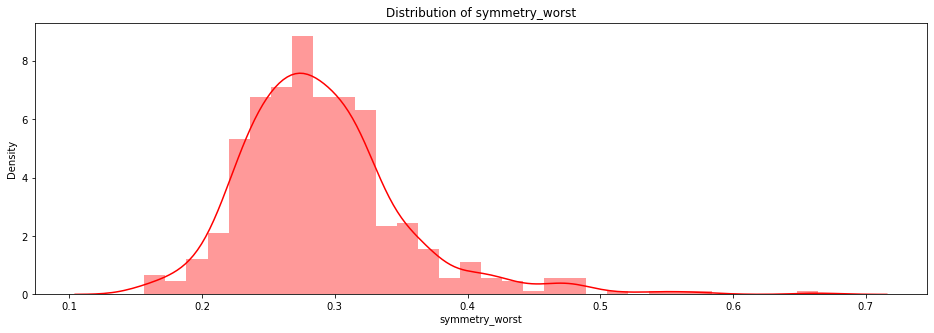

In [52]:
f28, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(df["symmetry_worst"], color="red",ax = axes)
plt.title("Distribution of symmetry_worst")

### Distribution of fractal_dimension_worst

Text(0.5, 1.0, 'Distribution of fractal_dimension_worst')

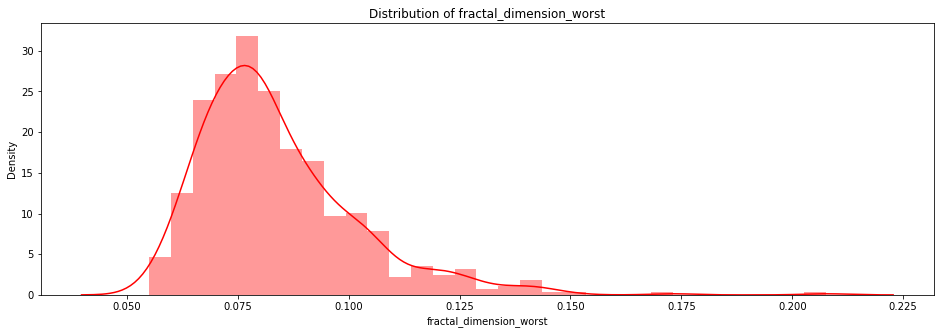

In [53]:
f29, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(df["fractal_dimension_worst"], color="red",ax = axes)
plt.title("Distribution of fractal_dimension_worst")

# Explore the data

Now lets Try to find a correlation between columns 

In [54]:
# Summary of all the numeric columns
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [55]:
len(df.columns)

31

In [56]:
print("Any missing sample in data set:",df.isnull().values.any(), "\n")

Any missing sample in data set: False 



In [57]:
#replace missing value with mean if exists
df = df.replace([np.inf, -np.inf], np.nan)
df= df.fillna(df.mean())
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Correlation in Data

In this work, I try to measure correlation in data using Correlation coefficients.

Correlation coefficientsare used to measure how strong a relationship is between two variables.Correlation coefficient formulas are used to find how strong a relationship is between data. The formulas return a value between -1 and 1, where:

1 indicates a strong positive relationship. -1 indicates a strong negative relationship.

A result of zero indicates no relationship at all.

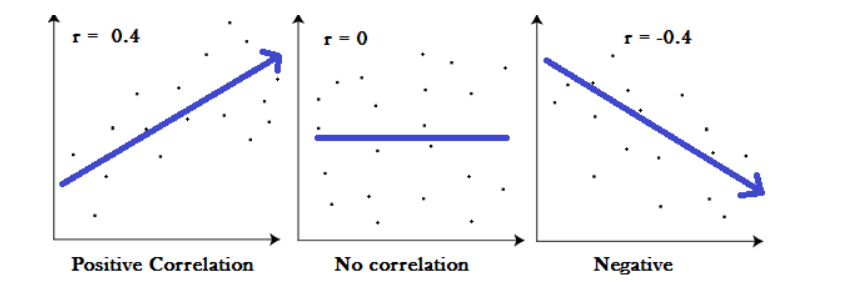

In [58]:
# Correlation Plot
corr = df.corr()
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [59]:
corr.shape

(30, 30)

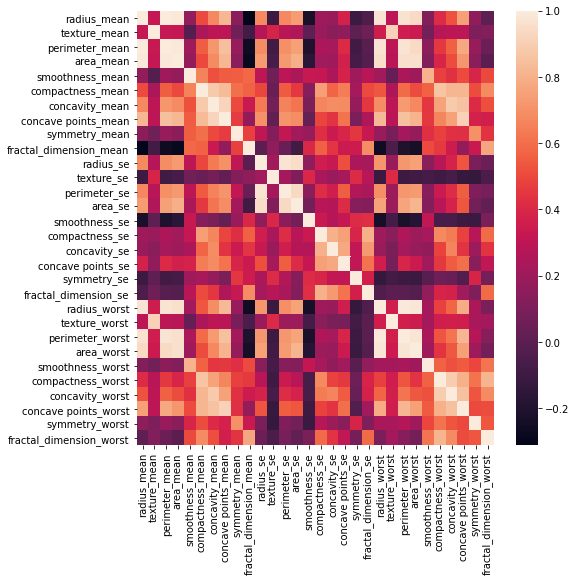

In [70]:
# HeatMap 
plt.figure(figsize=(8,8))
sns.heatmap(corr);

In [71]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [72]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

In [73]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [74]:
df['diagnosis'].unique()

array([1, 0])

In [75]:
X = df.drop('diagnosis', axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [76]:
y = df['diagnosis']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [77]:
# Spilting dataset into train and test data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [78]:
df.shape

(569, 31)

In [79]:
X_train.shape

(398, 30)

In [80]:
X_test.shape

(171, 30)

In [81]:
y_train.shape

(398,)

In [82]:
y_test.shape

(171,)

In [83]:
X_train.head(1)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
484,15.73,11.28,102.8,747.2,0.1043,0.1299,0.1191,0.06211,0.1784,0.06259,...,17.01,14.2,112.5,854.3,0.1541,0.2979,0.4004,0.1452,0.2557,0.08181


In [84]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [85]:
X_train

array([[ 0.41762049, -1.8674916 ,  0.4081951 , ...,  0.41198288,
        -0.56093931, -0.17099845],
       [ 0.11133713, -0.9750259 ,  0.12162204, ...,  0.32894168,
         0.37152857, -0.0176723 ],
       [ 0.43167019,  0.75356295,  0.52641158, ...,  1.29070969,
         0.56461535,  2.10736518],
       ...,
       [-0.12188782,  0.94287385, -0.04999568, ...,  1.25900306,
         2.38245678,  1.2357165 ],
       [ 0.30803287, -1.19588863,  0.39596581, ...,  1.83274222,
         2.75136242,  0.75578463],
       [-0.76536387, -1.04489064, -0.77111621, ..., -0.32965048,
        -0.39296951, -0.36633177]])

# Machine Learning Models

## 1)  Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [87]:
y_pred = lr.predict(X_test)

In [88]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0])

In [89]:
y_test

424    0
143    0
202    1
146    1
561    0
      ..
535    1
513    0
509    1
533    1
454    0
Name: diagnosis, Length: 171, dtype: int64

In [90]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9824561403508771


In [91]:
lr_acc = accuracy_score(y_test, y_pred)
print(lr_acc)

0.9824561403508771


In [92]:
results = pd.DataFrame()
results

""


In [93]:
tempResults = pd.DataFrame({'Algorithm':['Logistic Regression Method'], 'Accuracy':[lr_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Logistic Regression Method,0.982456


## 2) Decision Tree Classifier

In [94]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [95]:
y_pred = dtc.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0])

In [96]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9239766081871345


In [97]:
dtc_acc = accuracy_score(y_test, y_pred)
print(dtc_acc)

0.9239766081871345


In [98]:
tempResults = pd.DataFrame({'Algorithm':['Decision tree Classifier Method'], 'Accuracy':[dtc_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Logistic Regression Method,0.982456
0,Decision tree Classifier Method,0.923977


## 3) Random Forest Classifier

In [99]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [100]:
y_pred = rfc.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0])

In [101]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9649122807017544


In [102]:
rfc_acc = accuracy_score(y_test, y_pred)
print(rfc_acc)

0.9649122807017544


In [103]:
tempResults = pd.DataFrame({'Algorithm':['Random Forest Classifier Method'], 'Accuracy':[rfc_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Logistic Regression Method,0.982456
0,Decision tree Classifier Method,0.923977
0,Random Forest Classifier Method,0.964912


## 4) Support Vector Classifier

In [104]:
from sklearn import svm
svc = svm.SVC()
svc.fit(X_train,y_train)

SVC()

In [105]:
y_pred = svc.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0])

In [106]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9824561403508771


In [107]:
svc_acc = accuracy_score(y_test, y_pred)
print(svc_acc)

0.9824561403508771


In [108]:
tempResults = pd.DataFrame({'Algorithm':['Support Vector Classifier Method'], 'Accuracy':[svc_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Logistic Regression Method,0.982456
0,Decision tree Classifier Method,0.923977
0,Random Forest Classifier Method,0.964912
0,Support Vector Classifier Method,0.982456


We are getting maximum accuracy in Logistic Regression Model